# โหลด R packages

In [1]:
source("../R/oaeTS.R", encoding = "UTF-8")
year_now = 2563

Loading required package: pacman



# แปลงข้อมูลราคาเป็น long format

## ราคาเกษตรกร (Farmgate price)
รวมไฟล์ราคา แล้ว save เป็น RDS

In [3]:
root = "../data/rice/farmgate/"

rhfg = read_price_rice_fg(root, "rhfg.xlsx") %>% mutate(price_id = 'RHFG')
rwfg = read_price_rice_fg(root, "rwfg.xlsx") %>% mutate(price_id = 'RWFG')
rgfg = read_price_rice_fg(root, "rgfg.xlsx") %>% mutate(price_id = 'RGFG')

rice_fg = rbind(rhfg, rwfg, rgfg) %>%
  select(date, price_id, place, amount) %>%
  filter(date < '2020-04-01')

saveRDS(rice_fg, '../data/rice/rice_fg.rds')
rice_fg

date,price_id,place,amount
<date>,<chr>,<chr>,<dbl>
1989-01-01,RHFG,เฉลี่ยทั้งประเทศ,4237
1989-02-01,RHFG,เฉลี่ยทั้งประเทศ,4331
1989-03-01,RHFG,เฉลี่ยทั้งประเทศ,4420
...,...,...,...
2020-01-01,RGFG,นครราชสีมา,13280
2020-02-01,RGFG,นครราชสีมา,13791
2020-03-01,RGFG,นครราชสีมา,NA


## ราคาขายส่ง (Wholesale price)
รวมไฟล์ราคา แล้ว save เป็น RDS

In [4]:
rice_ws = data.frame()
for (i in 2545:year_now) {
    df = read_price_rice_ws(i)
    rice_ws = rbind(rice_ws, df)
}

saveRDS(rice_ws, '../data/rice/rice_ws.rds')
rice_ws

date,price_id,place,amount
<date>,<chr>,<chr>,<dbl>
2002-01-02,RHWS00AO,bangkok,10865
2002-01-03,RHWS00AO,bangkok,10865
2002-01-04,RHWS00AO,bangkok,10865
...,...,...,...
2020-03-16,RPWSA1GU,bangkok,9950
2020-03-17,RPWSA1GU,bangkok,9950
2020-03-18,RPWSA1GU,bangkok,9950


## ราคาส่งออก (Export price)
รวมไฟล์ราคา แล้ว save เป็น RDS

In [5]:
rice_ex_th = data.frame()
for (i in 2546:year_now){
    df = suppressWarnings(read_price_rice_ex(i))
    rice_ex_th = rbind(rice_ex_th, df)
}

saveRDS(rice_ex_th, '../data/rice/rice_ex_th.rds')
rice_ex_th

date,price_id,place,amount
<date>,<chr>,<chr>,<dbl>
2003-01-03,RHXB00AO,thailand,21248.81
2003-01-10,RHXB00AO,thailand,21214.09
2003-01-17,RHXB00AO,thailand,21192.17
...,...,...,...
2020-03-13,RPXBA1GU,thailand,11240.66
2020-03-06,RPXSA1GU,thailand,362.00
2020-03-13,RPXSA1GU,thailand,352.00


## รวม ราคา 3 ตลาด

In [6]:
rice_price = rbind(rice_fg, rice_ws, rice_ex_th)
saveRDS(rice_price, '../data/rice/rice_price.rds')

In [7]:
rice_price = readRDS('../data/rice/rice_price.rds')
rice_price

date,price_id,place,amount
<date>,<chr>,<chr>,<dbl>
1989-01-01,RHFG,เฉลี่ยทั้งประเทศ,4237
1989-02-01,RHFG,เฉลี่ยทั้งประเทศ,4331
1989-03-01,RHFG,เฉลี่ยทั้งประเทศ,4420
...,...,...,...
2020-03-13,RPXBA1GU,thailand,11240.66
2020-03-06,RPXSA1GU,thailand,362.00
2020-03-13,RPXSA1GU,thailand,352.00


# แปลงข้อมูลราคาเป็น wide format

## โหลด metadata

In [8]:
tbl_admin_tha1 = read_excel("../data/tbl_admin_tha1.xlsx")
tbl_admin_tha1

id,name_oae1,name_alt,name_th1,name_en1,HASC_1,reg,ADM1_PCODE,code
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
-5,รวมทั้งประเทศ,เฉลี่ยทั้งประเทศ|รวมทั้งประเทศ,ประเทศ,Whole Kingdom,TH.0,AGG,NA,00
-4,ภาคเหนือ,เหนือ,ภาคเหนือ,Northern Region,TH.1,AGG,NA,01
-3,ภาคตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ภาคตะวันออกเฉียงเหนือ,North-Eastern Region,TH.2,AGG,NA,02
...,...,...,...,...,...,...,...,...
75,ปัตตานี,ปัตตานี,ปัตตานี,Pattani,TH.PI,S,TH94,94
76,ยะลา,ยะลา,ยะลา,Yala,TH.YL,S,TH95,95
77,นราธิวาส,นราธิวาส,นราธิวาส,Narathiwat,TH.NW,S,TH96,96


## ราคาเกษตรกร

In [9]:
prices = c("RGFG_0", #"RGFG_1", "RGFG_2", "RGFG_3",
           "RGFG_KK", "RGFG_SN", "RGFG_UN", "RGFG_KL", "RGFG_MS",
           "RHFG_0", #"RHFG_1", "RHFG_2", "RHFG_3", 
           "RHFG_SU", "RHFG_NR", "RHFG_UR", "RHFG_SI", "RHFG_BR",
           "RWFG_0", #"RWFG_1", "RWFG_2", "RWFG_3", 
           "RWFG_NS", "RWFG_PC", "RWFG_KP", "RWFG_SH", "RWFG_PS"
          )

rice_fg_wide = rice_price %>%
  filter(endsWith(price_id, "FG")) %>%
  mutate(HASC_1 = sapply(place,
                         lookup,
                         tbl_admin_tha1, 
                         key = 'name_th1', 
                         alt = 'name_alt',
                         val = 'HASC_1',
                         simplify = TRUE)
        ) %>%
  left_join(tbl_admin_tha1, by=c('HASC_1')) %>%
  mutate(place_id = str_replace_all(HASC_1, "TH.", "")) %>%
  mutate(price_id = paste(price_id, place_id, sep="_")) %>%
  mutate(date = floor_date(date, "month")) %>%
  filter(price_id %in% prices) %>%
  pivot_wider(id_cols = date,
              names_from = price_id,
              values_from = amount,
              values_fn = list(amount = mean)
             )

rice_fg_wide

Warning message:
"Column `HASC_1` has different attributes on LHS and RHS of join"


date,RHFG_0,RHFG_NR,RHFG_BR,RHFG_SI,RHFG_SU,RHFG_UR,RWFG_0,RWFG_NS,RWFG_KP,RWFG_PC,RWFG_PS,RWFG_SH,RGFG_0,RGFG_UN,RGFG_SN,RGFG_KK,RGFG_MS,RGFG_KL
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1989-01-01,4237,NA,NA,NA,NA,NA,3939,NA,NA,NA,NA,NA,3317,3320,3239,3600,NA,NA
1989-02-01,4331,4467,NA,NA,NA,NA,4056,NA,NA,NA,NA,NA,3385,3376,3418,3475,NA,NA
1989-03-01,4420,4517,NA,NA,NA,NA,4135,NA,NA,NA,NA,NA,3370,3405,3348,3465,NA,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-01,13757,13860,13775,14196,13858,14092,7756,7422,7408,7366,7520,7726,14258,16107,15180,15642,15683,14717
2020-02-01,13914,13825,13840,14182,13722,14232,8166,7557,7537,7577,7612,8252,14732,16587,14679,16013,16566,15193
2020-03-01,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


## ราคาขายส่ง ราคาส่งออก

In [10]:
prices = c("RHWS00BO", "RHWS00BN", # hommali rice wholesale
           "RHXB00BO", "RHXB00BN", # hommali rice export
           "RWWS05GO", "RWWS05GN", # white rice wholesale 
           "RWXB05GU", # white rice export 
           "RGWS10LO", "RGWS10LN", # glutinous wholesale
           "RGXB10GF", "RGXB10GS", "RGXB10GU", "RGXB10LU" # glutinous export
          )

rice_price_wide = rice_price %>%
  select(-place) %>%
  filter(price_id %in% prices) %>%
  filter(!is.na(date)) %>% # there are some missing date due to week
  mutate(date = floor_date(date, "month")) %>%
  mutate(price_id = substr(price_id, start = 1, stop = 4)) %>%
  pivot_wider(id_cols = date,
              names_from = price_id,
              values_from = amount,
              values_fn = list(amount = mean)
             )

rice_price_wide = rice_fg_wide %>% left_join(rice_price_wide, by="date")
rice_price_wide

date,RHFG_0,RHFG_NR,RHFG_BR,RHFG_SI,RHFG_SU,RHFG_UR,RWFG_0,RWFG_NS,RWFG_KP,RWFG_PC,RWFG_PS,RWFG_SH,RGFG_0,RGFG_UN,RGFG_SN,RGFG_KK,RGFG_MS,RGFG_KL,RHWS,RWWS,RGWS,RHXB,RWXB,RGXB
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1989-01-01,4237,NA,NA,NA,NA,NA,3939,NA,NA,NA,NA,NA,3317,3320,3239,3600,NA,NA,NA,NA,NA,NA,NA,NA
1989-02-01,4331,4467,NA,NA,NA,NA,4056,NA,NA,NA,NA,NA,3385,3376,3418,3475,NA,NA,NA,NA,NA,NA,NA,NA
1989-03-01,4420,4517,NA,NA,NA,NA,4135,NA,NA,NA,NA,NA,3370,3405,3348,3465,NA,NA,NA,NA,NA,NA,NA,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-01,13757,13860,13775,14196,13858,14092,7756,7422,7408,7366,7520,7726,14258,16107,15180,15642,15683,14717,31050.00,12463.64,35686.36,34581.83,13592.89,38754.84
2020-02-01,13914,13825,13840,14182,13722,14232,8166,7557,7537,7577,7612,8252,14732,16587,14679,16013,16566,15193,30976.32,12831.58,34997.37,34663.58,14214.23,35675.46
2020-03-01,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,30650.00,13923.08,32800.00,34713.48,15816.10,32969.51


# เพิ่ม dummy variables

In [11]:
# dummy years ช่วงวิกฤตอาหารครั้งที่ 1
start_foodcrisis = as.Date('2008/1/1')
end_foodcrisis = as.Date('2008/6/1')

# dummy years ช่วงนโยบายจำนำข้าวทุกเมล็ดของ นายก ยิ่งลักษณ์
start_pledge = as.Date('2011/10/1')
end_pledge = as.Date('2014/02/1')

In [13]:
rice_price_wide = rice_price_wide %>%
  mutate(d_foodcrisis = ifelse(date >= start_foodcrisis & 
                               date <= end_foodcrisis, 1, 0)) %>%
  mutate(d_pledge = ifelse(date >= start_pledge & 
                               date <= end_pledge, 1, 0))

saveRDS(rice_price_wide, '../data/rice/rice_price_tidy.rds')
rice_price_wide

date,RHFG_0,RHFG_NR,RHFG_BR,RHFG_SI,RHFG_SU,RHFG_UR,RWFG_0,RWFG_NS,RWFG_KP,RWFG_PC,RWFG_PS,RWFG_SH,RGFG_0,RGFG_UN,RGFG_SN,RGFG_KK,RGFG_MS,RGFG_KL,RHWS,RWWS,RGWS,RHXB,RWXB,RGXB,d_foodcrisis,d_pledge
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1989-01-01,4237,NA,NA,NA,NA,NA,3939,NA,NA,NA,NA,NA,3317,3320,3239,3600,NA,NA,NA,NA,NA,NA,NA,NA,0,0
1989-02-01,4331,4467,NA,NA,NA,NA,4056,NA,NA,NA,NA,NA,3385,3376,3418,3475,NA,NA,NA,NA,NA,NA,NA,NA,0,0
1989-03-01,4420,4517,NA,NA,NA,NA,4135,NA,NA,NA,NA,NA,3370,3405,3348,3465,NA,NA,NA,NA,NA,NA,NA,NA,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-01,13757,13860,13775,14196,13858,14092,7756,7422,7408,7366,7520,7726,14258,16107,15180,15642,15683,14717,31050.00,12463.64,35686.36,34581.83,13592.89,38754.84,0,0
2020-02-01,13914,13825,13840,14182,13722,14232,8166,7557,7537,7577,7612,8252,14732,16587,14679,16013,16566,15193,30976.32,12831.58,34997.37,34663.58,14214.23,35675.46,0,0
2020-03-01,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,30650.00,13923.08,32800.00,34713.48,15816.10,32969.51,0,0


# จัดการ missing values

In [2]:
price = readRDS('../data/rice/rice_price_tidy.rds')
price_ts = price %>% select(-date) %>% ts(start = 1989, freq = 12)
price_xts = column_to_rownames(price, var = "date") %>% as.xts()
# price_fg = rice_fg_wide %>% 
#   column_to_rownames(var = "date") %>% as.xts()

In [3]:
sapply(price_ts, function(x) sum(!is.na(x)))

RHFG_0      RHFG_NR      RHFG_BR      RHFG_SI      RHFG_SU      RHFG_UR 
         363          353          325          325          325          308 
      RWFG_0      RWFG_NS      RWFG_KP      RWFG_PC      RWFG_PS      RWFG_SH 
         374          159          159          159          154          158 
      RGFG_0      RGFG_UN      RGFG_SN      RGFG_KK      RGFG_MS      RGFG_KL 
         374          374          370          362          347          278 
        RHWS         RWWS         RGWS         RHXB         RWXB         RGXB 
         219          219          219          207          207          207 
d_foodcrisis     d_pledge 
         375          375

## ข้าวหอมมะลิ
ข้าวหอมมะลิ อุบล เริ่มตั้งแต่ปี มค 1997

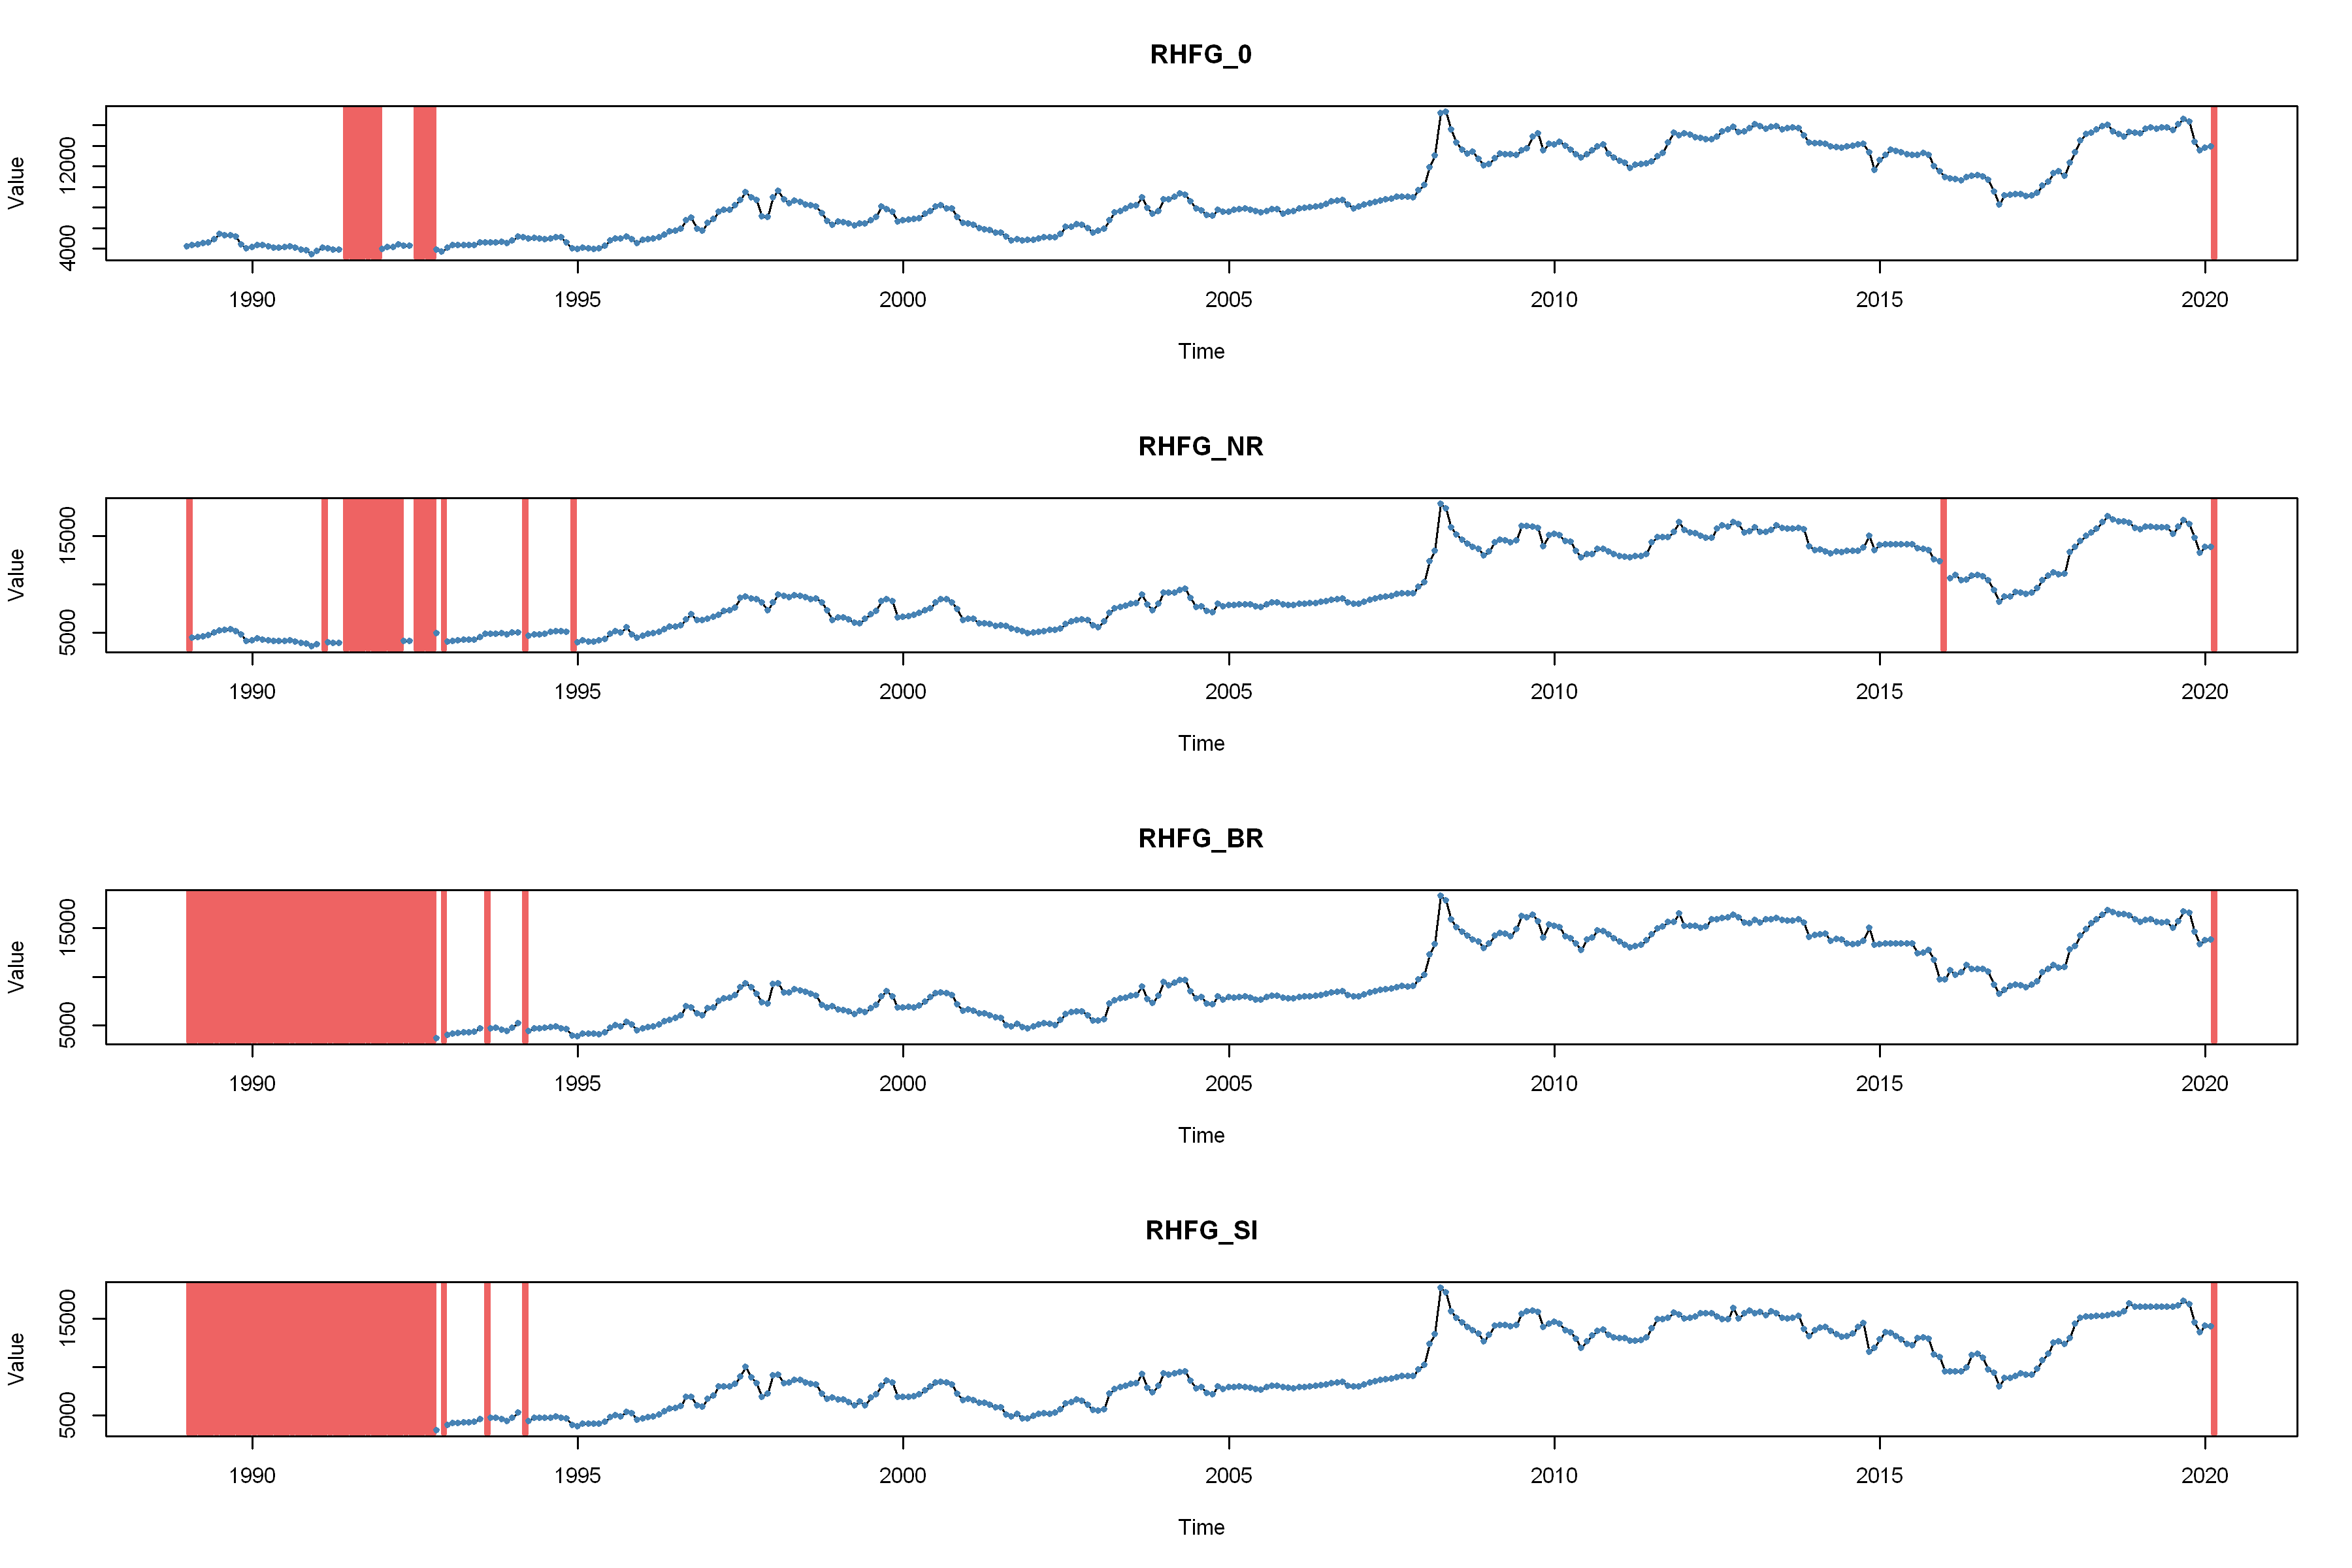

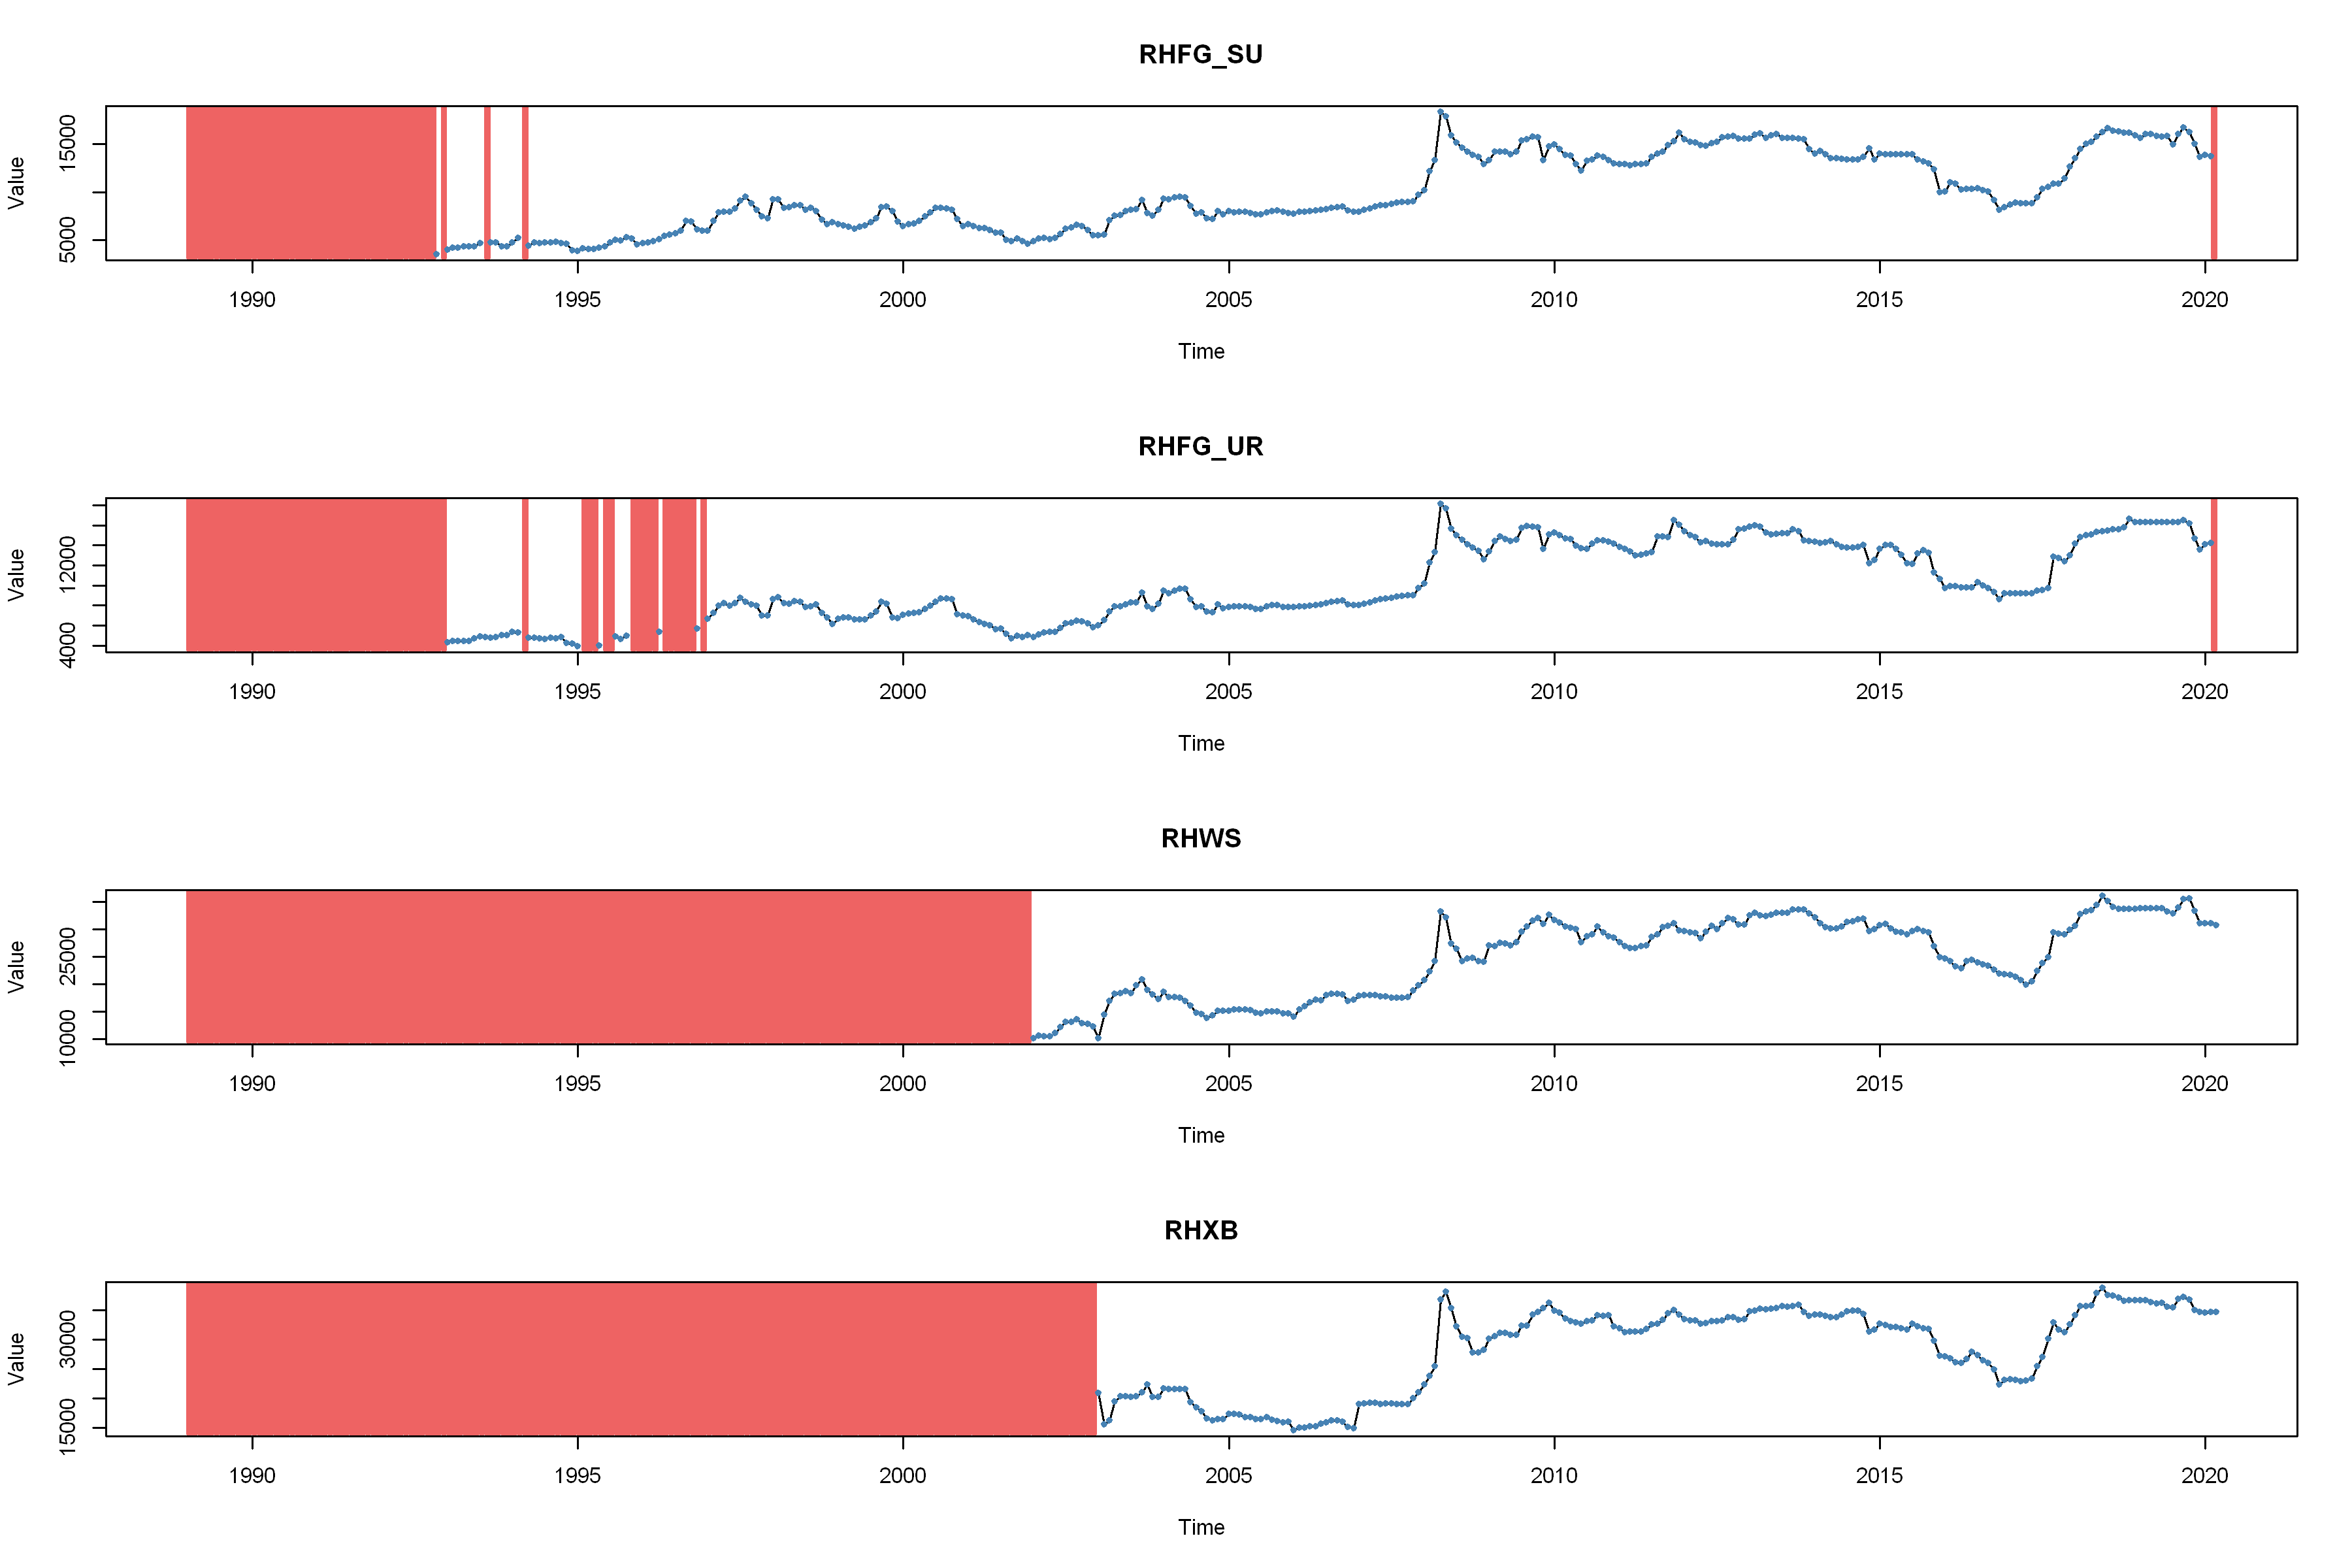

In [16]:
cols = colnames(price_ts)[startsWith(colnames(price_ts), 'RH')]
p_rice = price_ts[, cols]
set_figsize(12, 8)
par(mfrow=c(4, 1))
for (i in 1:ncol(p_rice)) {
  plotNA.distribution(p_rice[,i], main=colnames(p_rice)[i])
}

## ข้าวเจ้าอื่น
2. ข้าวเจ้าขาว ราคารายจังหวัดเริ่มตั้งแต่ปี ธค 2006
3. ข้าวเเหนียว กาฬสินธุ์เริ่มตั้งแต่ปี มค 1997

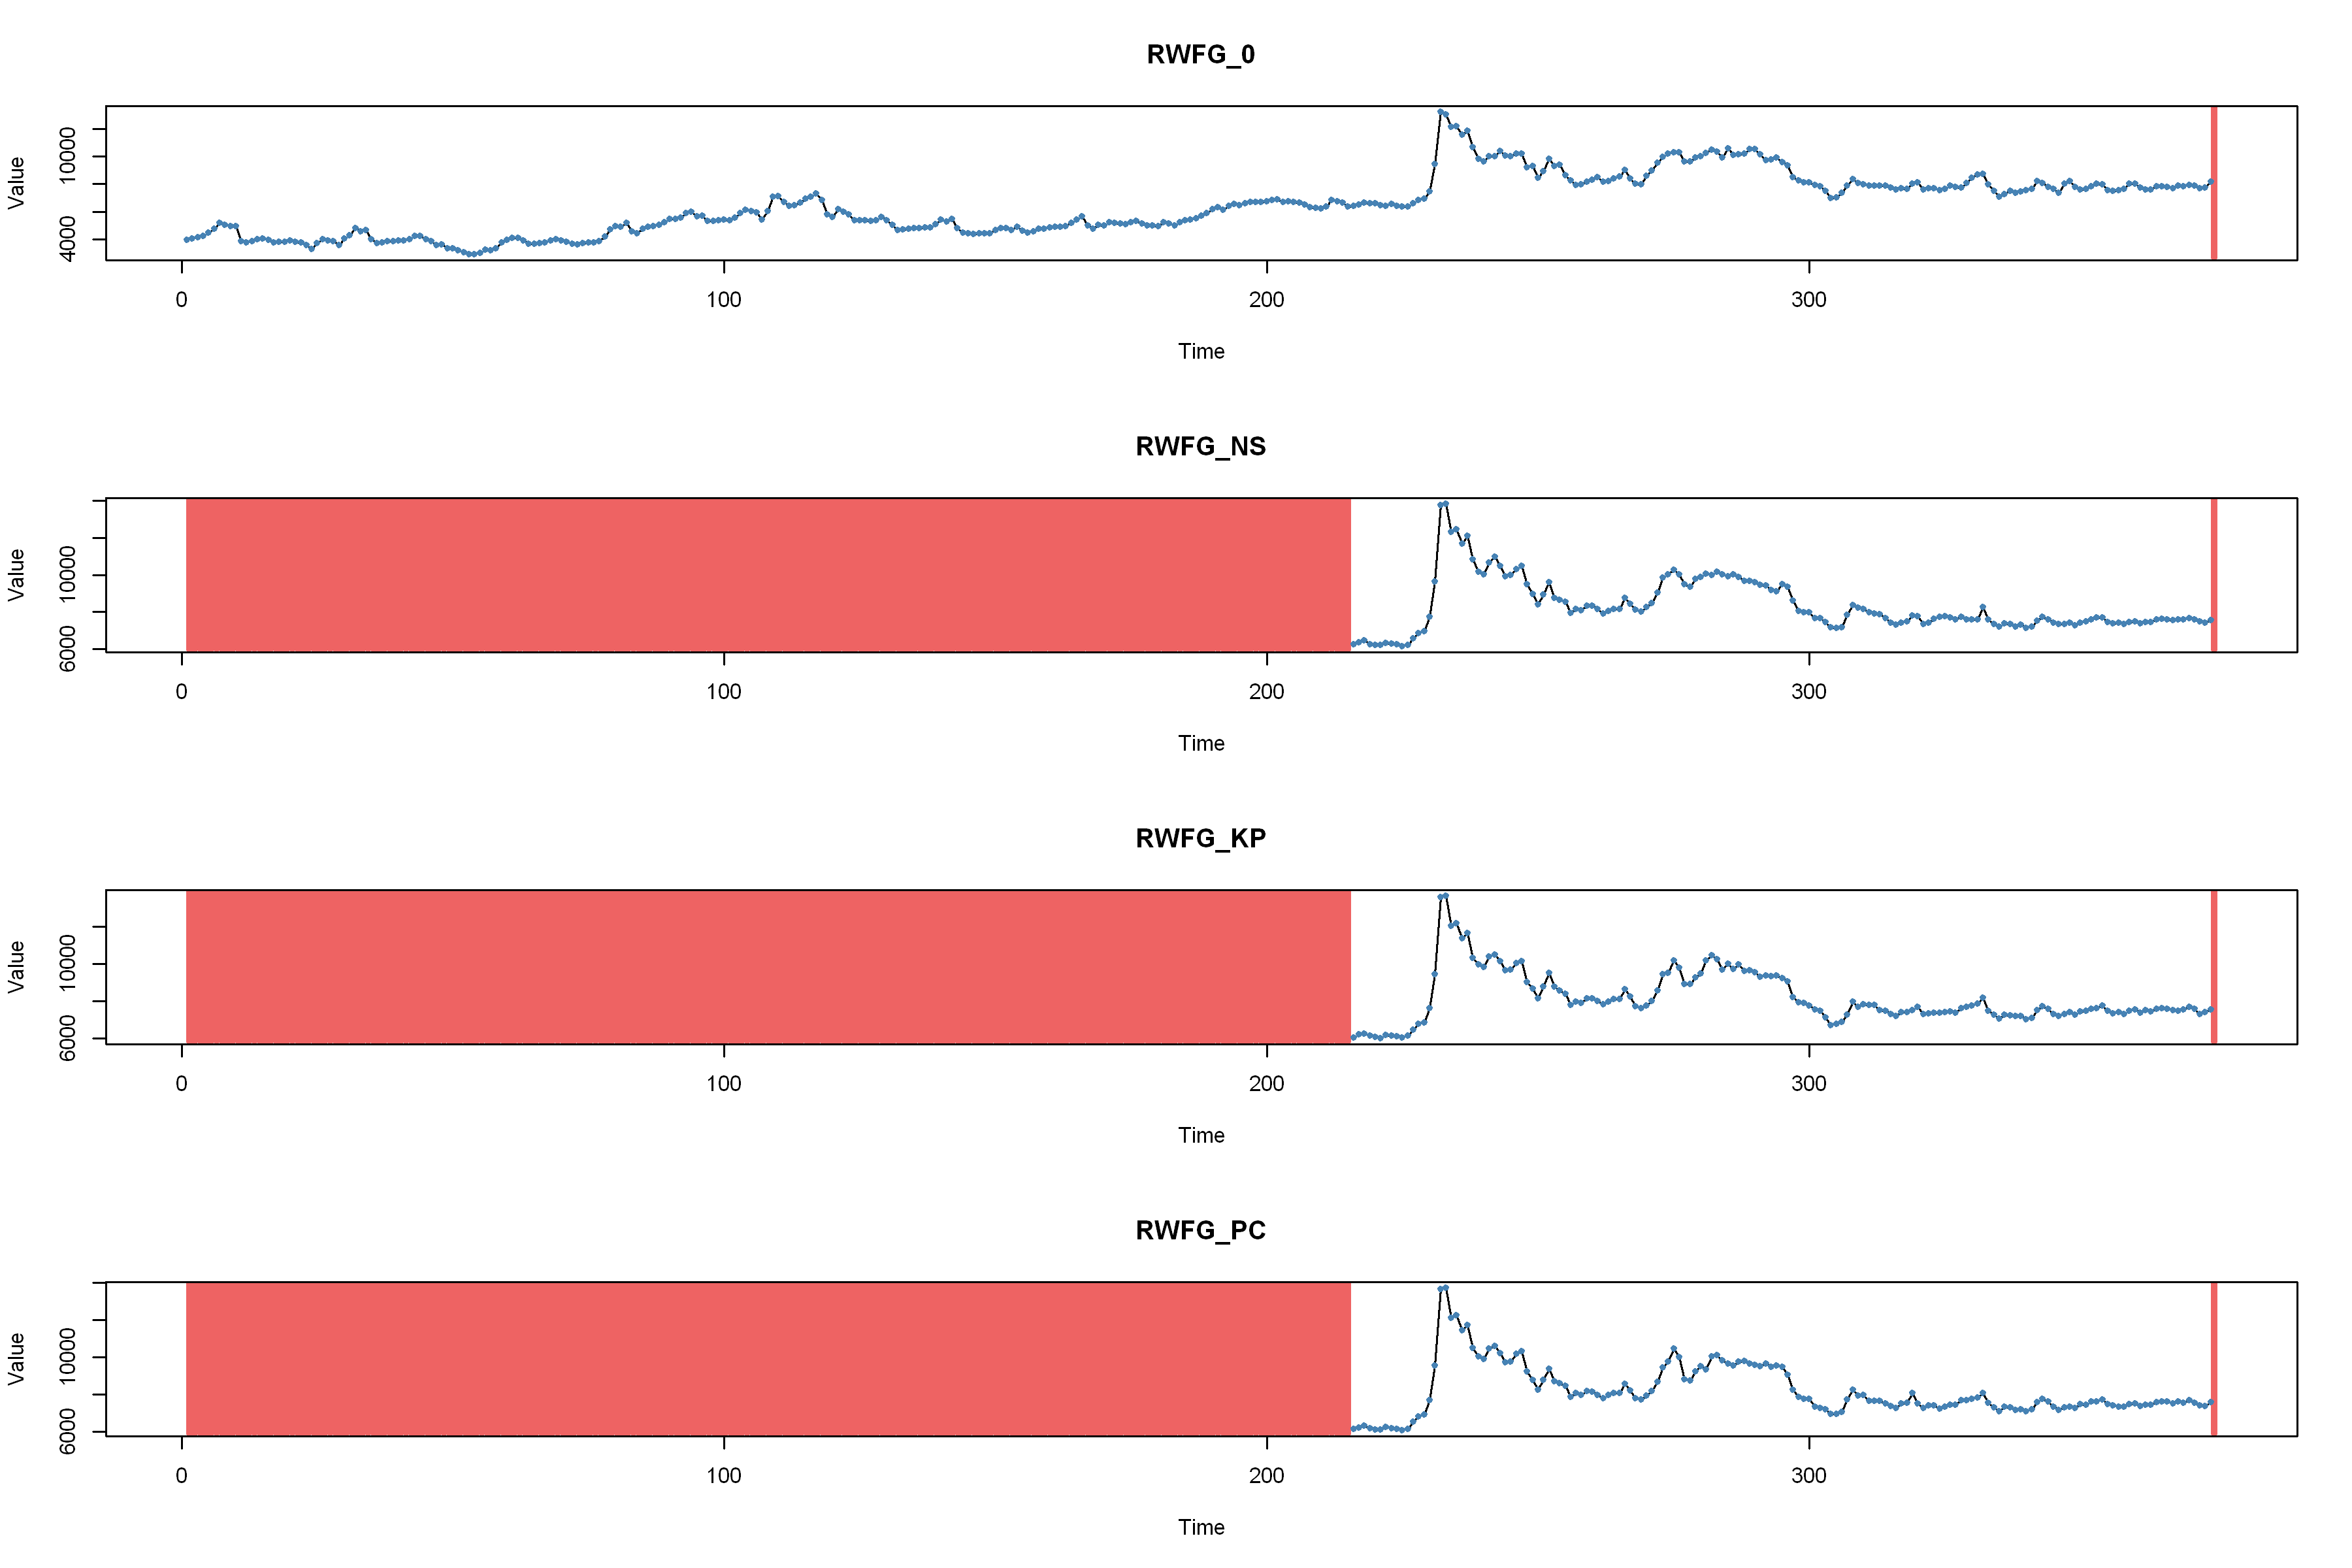

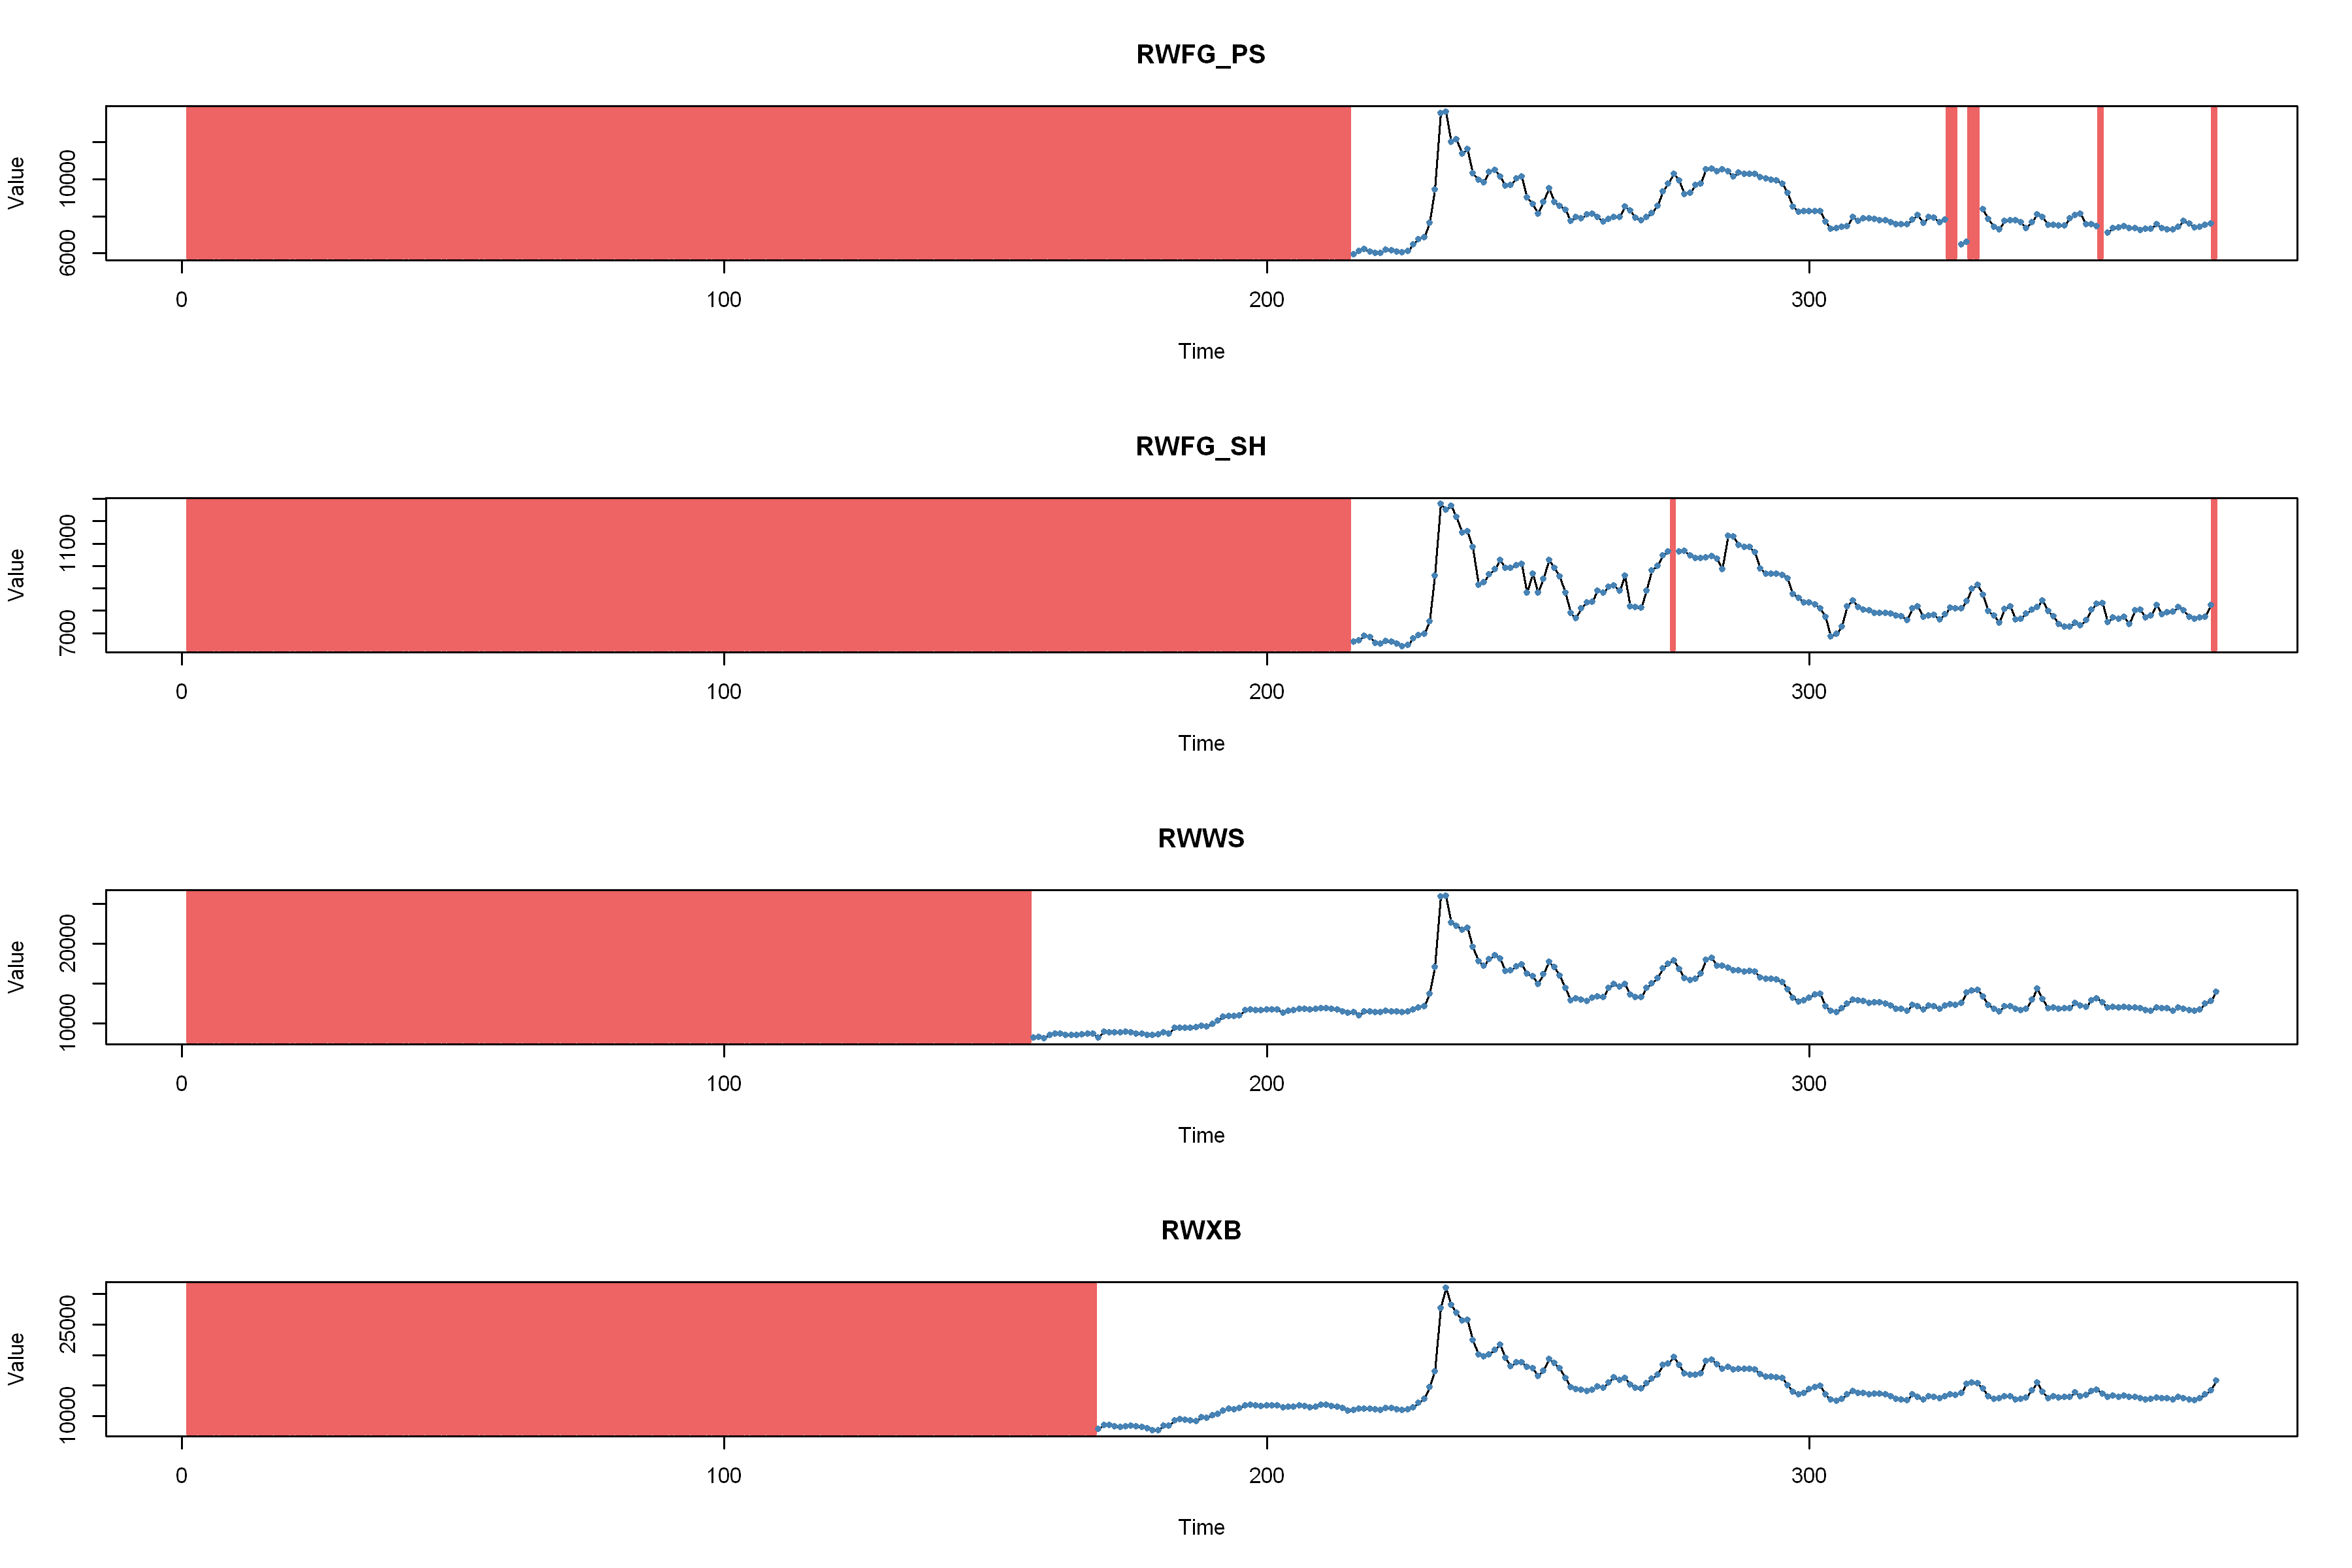

In [17]:
cols = names(price_xts)[startsWith(names(price_xts), 'RW')]
p_rice = price_xts[, cols]
set_figsize(12, 8)
par(mfrow=c(4, 1))
for (i in 1:ncol(p_rice)) {
  plotNA.distribution(p_rice[,i], main=names(p_rice)[i])
}

## ข้าวเหนียว

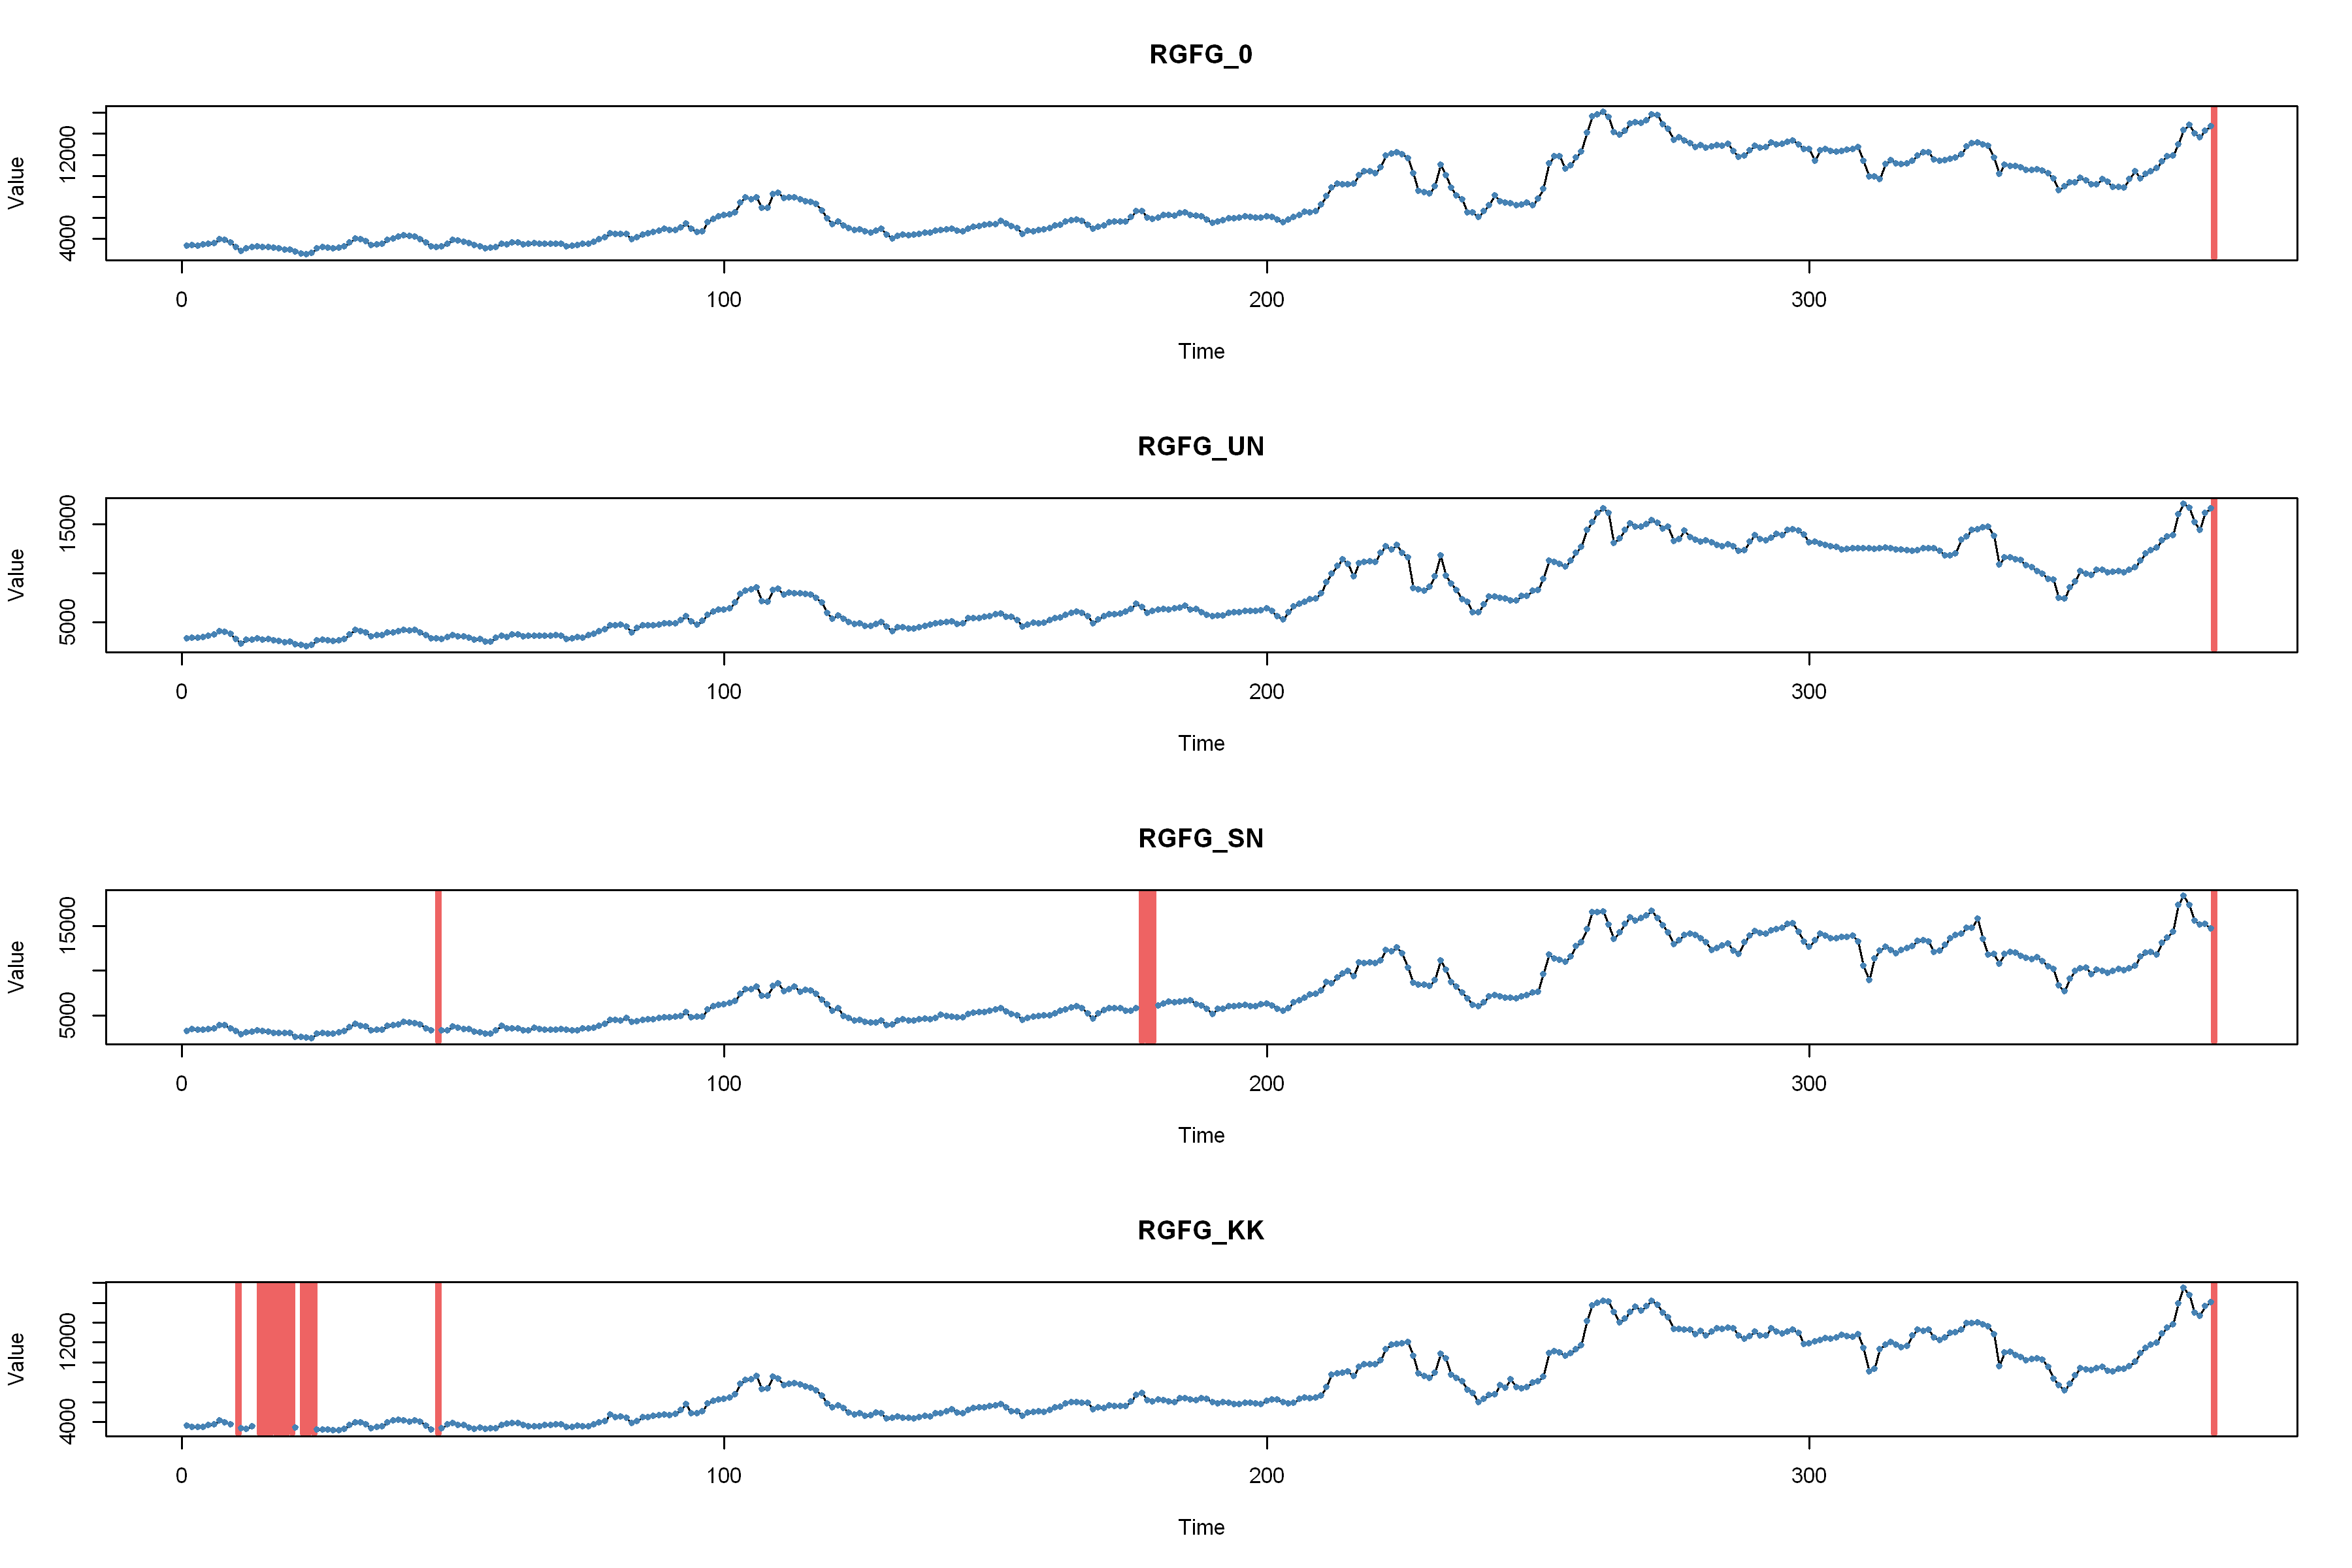

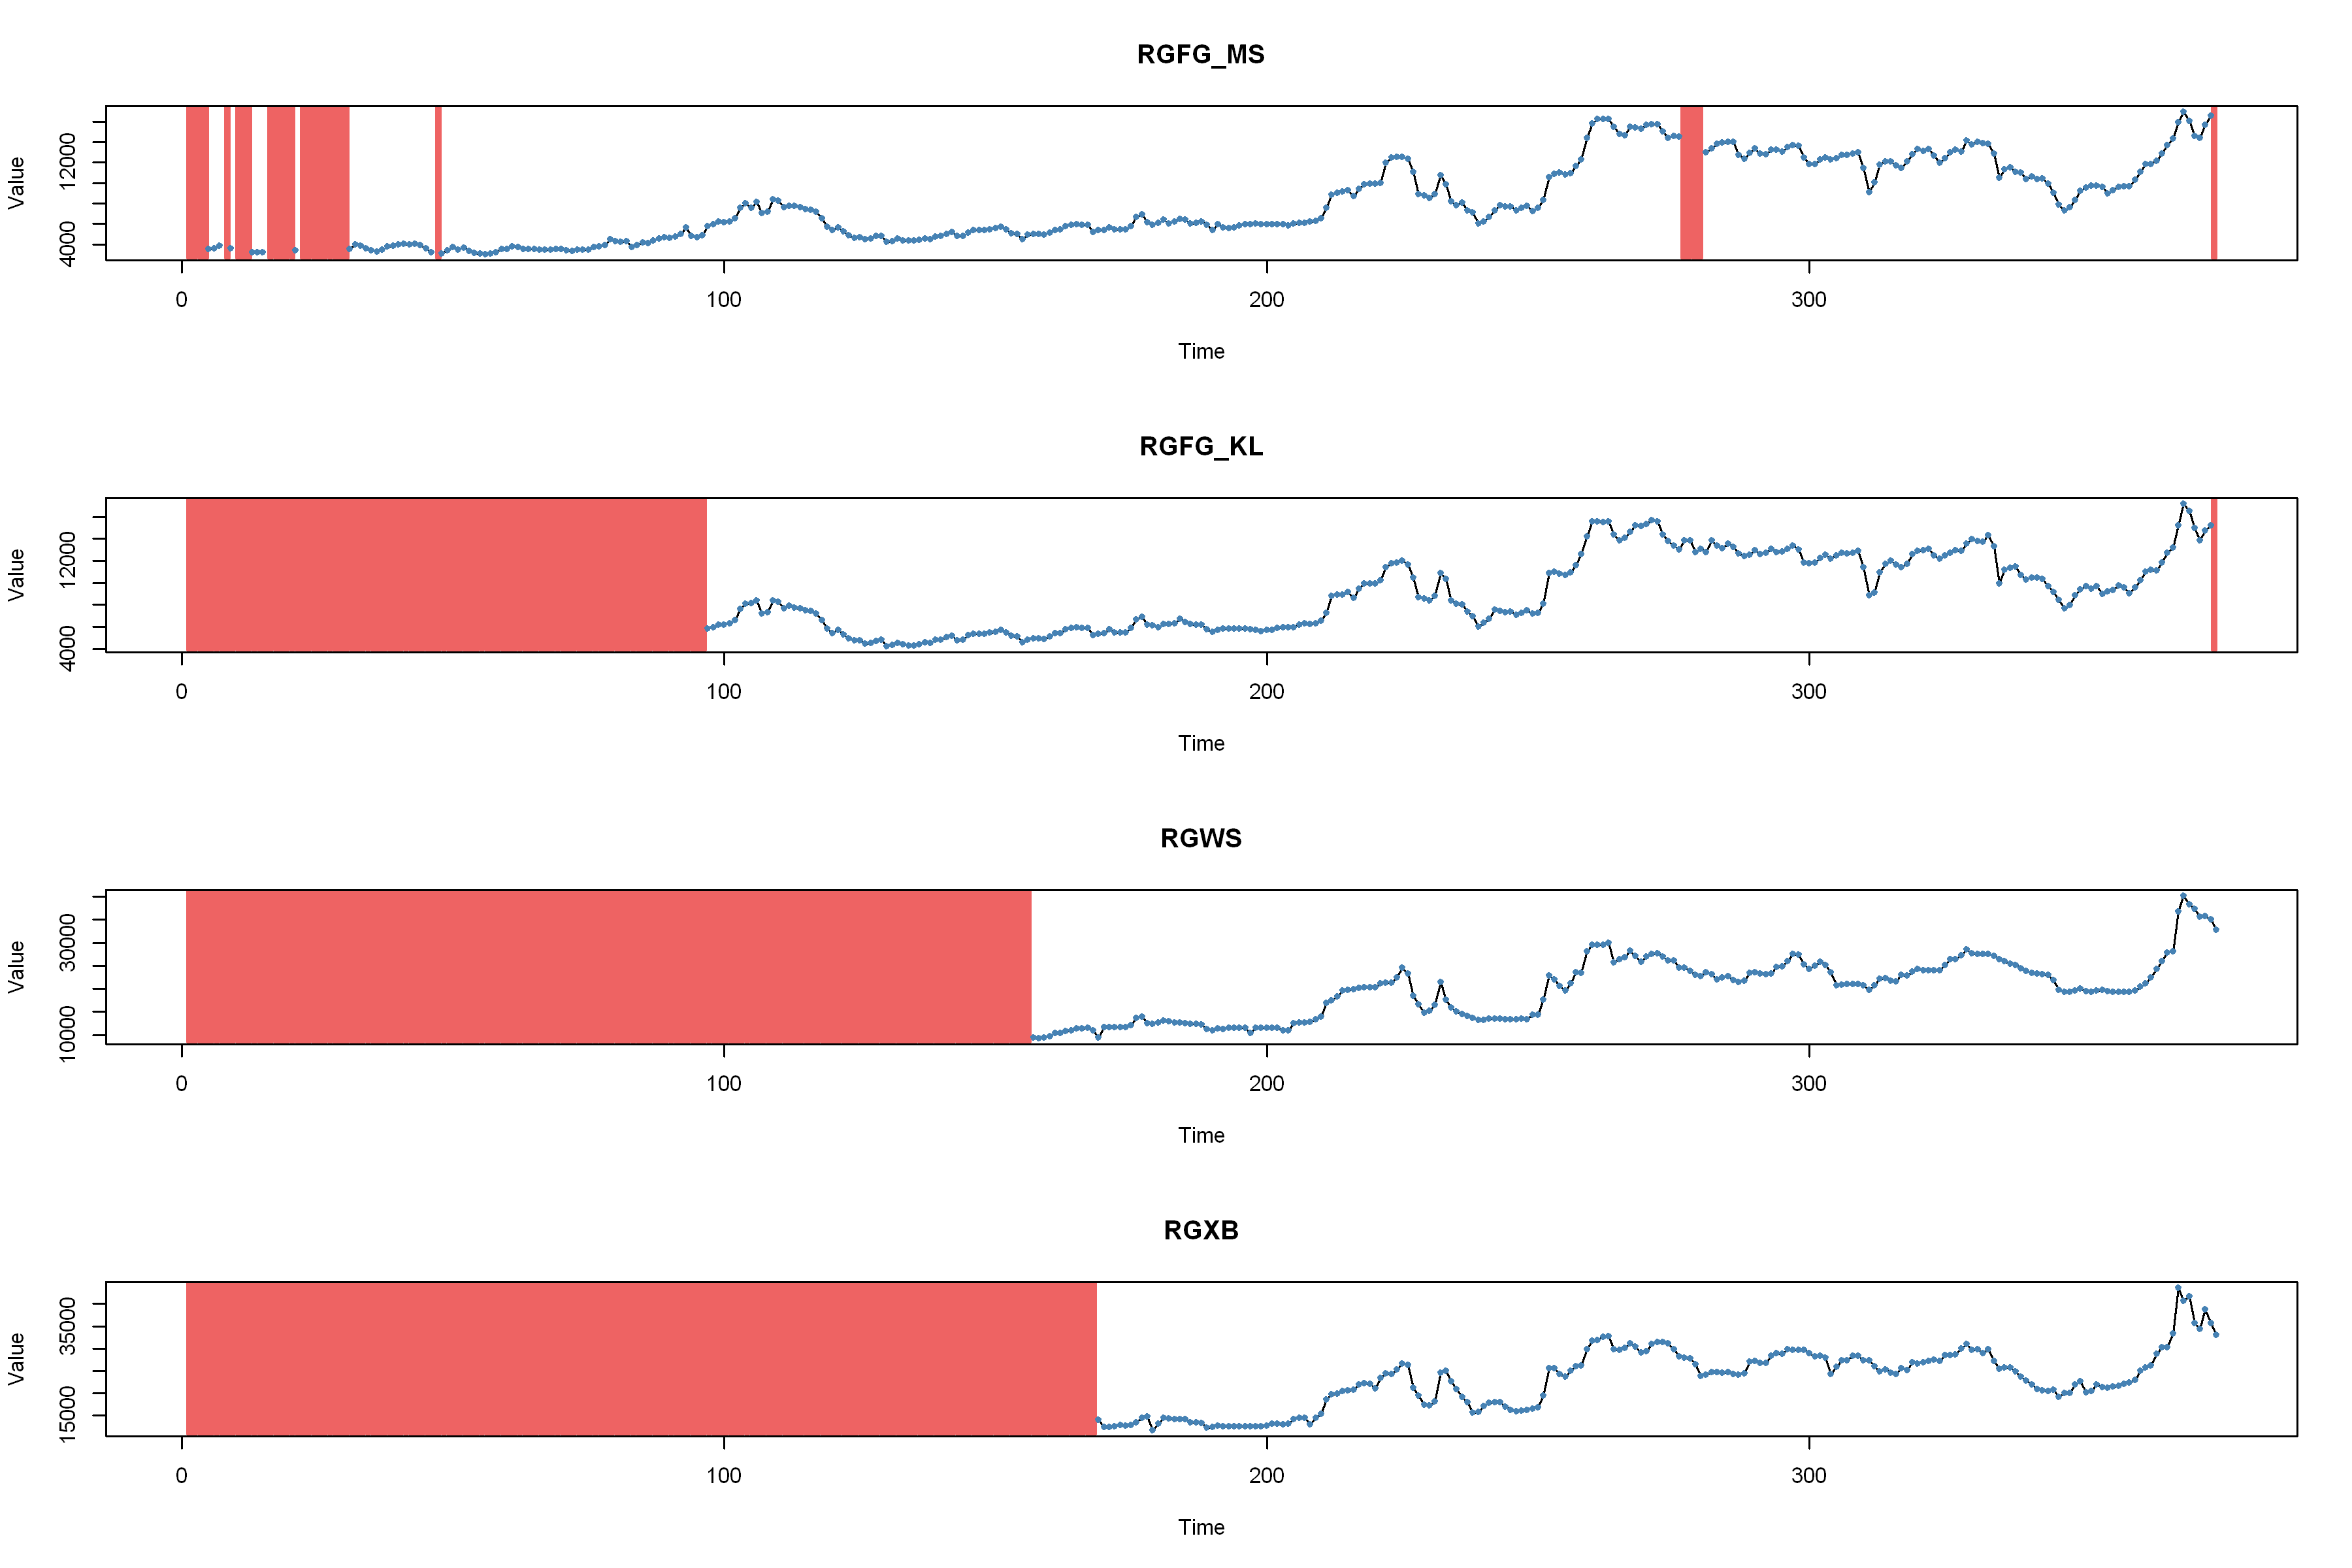

In [18]:
cols = names(price_xts)[startsWith(names(price_xts), 'RG')]
p_rice = price_xts[, cols]
set_figsize(12, 8)
par(mfrow=c(4, 1))
for (i in 1:ncol(p_rice)) {
  plotNA.distribution(p_rice[,i], main=names(p_rice)[i])
}

In [4]:
price_ts_filled = na_kalman(price_ts, model = "auto.arima", maxgap = 12)
saveRDS(price_ts_filled, '../data/rice/rice_price_filled.rds')
tail(price_ts_filled)

,RHFG_0,RHFG_NR,RHFG_BR,RHFG_SI,RHFG_SU,RHFG_UR,RWFG_0,RWFG_NS,RWFG_KP,RWFG_PC,RWFG_PS,RWFG_SH,RGFG_0,RGFG_UN,RGFG_SN,RGFG_KK,RGFG_MS,RGFG_KL,RHWS,RWWS,RGWS,RHXB,RWXB,RGXB,d_foodcrisis,d_pledge
Jan 1989,4237.000,4520.049,NA,NA,NA,NA,3939.000,NA,NA,NA,NA,NA,3317.00,3320.0,3239.000,3600.000,12286.627,NA,NA,NA,NA,NA,NA,NA,0,0
Feb 1989,4331.000,4467.000,NA,NA,NA,NA,4056.000,NA,NA,NA,NA,NA,3385.00,3376.0,3418.000,3475.000,9960.830,NA,NA,NA,NA,NA,NA,NA,0,0
Mar 1989,4420.000,4517.000,NA,NA,NA,NA,4135.000,NA,NA,NA,NA,NA,3370.00,3405.0,3348.000,3465.000,7719.910,NA,NA,NA,NA,NA,NA,NA,0,0
Apr 1989,4506.000,4600.000,NA,NA,NA,NA,4249.000,NA,NA,NA,NA,NA,3437.00,3468.0,3356.000,3487.000,5342.183,NA,NA,NA,NA,NA,NA,NA,0,0
May 1989,4620.000,4745.000,NA,NA,NA,NA,4450.000,NA,NA,NA,NA,NA,3553.00,3580.0,3464.000,3663.000,3550.000,NA,NA,NA,NA,NA,NA,NA,0,0
Jun 1989,4886.000,4980.000,NA,NA,NA,NA,4775.000,NA,NA,NA,NA,NA,3621.00,3685.0,3549.000,3750.000,3588.000,NA,NA,NA,NA,NA,NA,NA,0,0
Jul 1989,5400.000,5200.000,NA,NA,NA,NA,5184.000,NA,NA,NA,NA,NA,3980.00,4061.0,3898.000,4100.000,3850.000,NA,NA,NA,NA,NA,NA,NA,0,0
Aug 1989,5268.000,5250.000,NA,NA,NA,NA,5049.000,NA,NA,NA,NA,NA,3915.00,3965.0,3859.000,3950.000,3798.457,NA,NA,NA,NA,NA,NA,NA,0,0
Sep 1989,5322.000,5350.000,NA,NA,NA,NA,4963.000,NA,NA,NA,NA,NA,3652.00,3743.0,3543.000,3725.000,3600.000,NA,NA,NA,NA,NA,NA,NA,0,0
Oct 1989,5193.000,5150.000,NA,NA,NA,NA,4952.000,NA,NA,NA,NA,NA,3212.00,3261.0,3207.000,3571.610,3465.033,NA,NA,NA,NA,NA,NA,NA,0,0


# กราฟ

In [5]:
data = rice_price %>%
    filter(year(date)>2002) %>%
    filter((place=='เฉลี่ยทั้งประเทศ' & price_id=='RHFG') |
           price_id=='RHWS00BO' | price_id=='RHXB00BO'
          )

g = ggplot(data, aes(date, amount, colour=price_id)) +
    geom_line() + xlab("") + ylab("price") +
    scale_color_tableau() + 
    theme_light()
ggplotly(g)

ERROR: Error in eval(lhs, parent, parent): object 'rice_price' not found


# Backup

In [69]:
# rice_fg_wide = rice_price %>%
#   filter(grepl('FG', price_id)) %>%
#   filter(!is.na(amount)) %>%
#   filter(!is.na(date)) %>%
#   left_join(tbl_admin_tha1, by=c("place" = "name_oae1")) %>%
#   mutate(place_id = str_replace_all(HASC_1, "TH.", "")) %>%
#   mutate(new_price_id=paste(price_id, place_id, sep="_")) %>%
#   mutate(month = floor_date(date, "month")) %>%
#   filter(new_price_id %in% prices) %>%
#   select(month, place, new_price_id, amount) %>%
#   group_by(month, new_price_id) %>%
#   summarise(amount = mean(amount)) %>%
#   spread(new_price_id, amount)

# write.xlsx(rice_price_wide, '../data/rice/rice_price_wide.xlsx')

In [ ]:
# prices = c("RHWS00BO", "RHWS00BN", # hommali rice wholesale
#            "RHXB00BO", "RHXB00BN", # hommali rice export
#            "RWWS05GO", "RWWS05GN", # white rice wholesale 
#            "RWXB05GU", # white rice export 
#            "RGWS10LO", "RGWS10LN", # glutinous wholesale
#            "RGXB10GF", "RGXB10GS", "RGXB10GU", "RGXB10LU" # glutinous export
#           )

# rice_price_wide = rice_price %>%
#     select(-place) %>%
#     filter(price_id %in% prices) %>%
#     filter(!is.na(date)) %>%
#     mutate(month = floor_date(date, "month")) %>%
#     mutate(new_price_id = substr(price_id,start = 1, stop = 4)) %>%
#     group_by(month, new_price_id) %>%
#     summarise(amount = mean(amount)) %>%
#     spread(new_price_id, amount) %>%
#     right_join(rice_fg_wide, by="month")

In [63]:
check <- rice_price %>%
    filter(grepl('FG', price_id)) %>%
    mutate(count = !is.na(amount)) %>%
    group_by(place, price_id) %>%
    summarise(sum = sum(count)) %>%
    spread(price_id, sum)

write.xlsx(check, '../data/rice/check.xlsx')

# สร้างตารางอธิบายชื่อ ข้อมูลราคา (`tbl_rice_price`)

In [132]:
# library(rio)
# data_list <- import_list("../data/data_dict.xlsx")

# A <- data_list$aa['aa']
# B <- data_list$bb['bb']
# C <- data_list$cc['cc']
# D <- data_list$d['d']
# E <- data_list$e['e']

# price_id_names <- unique(rice_price$price_id)

# tbl_rice_price <- crossing(A,B,C,D,E) %>% 
#     mutate(price_id = pmap_chr(., paste, sep="")) %>%
#     mutate(price_id = str_replace_all(price_id, "Z", "")) %>%
#     filter(price_id %in% price_id_names)

# tbl_rice_price <- tbl_price_rice %>%
#     left_join(data_list$aa) %>%
#     left_join(data_list$bb) %>%
#     left_join(data_list$cc) %>%
#     left_join(data_list$d) %>%
#     left_join(data_list$e) %>%
#     unite(price_name, c(aa_name, bb_name, cc_name, d_name, e_name), sep = " ", remove = FALSE) %>%
#     unite(price_name_th, c(aa_name_th, bb_name_th, cc_name_th, d_name_th, e_name_th), sep = " ", remove = FALSE) %>%
#     mutate(price_name = str_replace_all(price_name, "NA", "")) %>% 
#     mutate(price_name_th = str_replace_all(price_name_th, "NA", ""))

# write.xlsx(tbl_rice_price, '../data/rice/tbl_rice_price.xlsx')

In [133]:
# count_by_price_id <- rice_price %>%
#     group_by(price_id) %>%
#     summarize(sum(!is.na(amount))) %>%
#     left_join(tbl_rice_price)
# write.xlsx(count_by_price_id, '../data/rice/count_by_price_id.xlsx')

In [134]:
# write.xlsx(unique(rice_fg$place), 'changwat.xlsx')